Valor anómalo

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Sueldo en función de la edad')

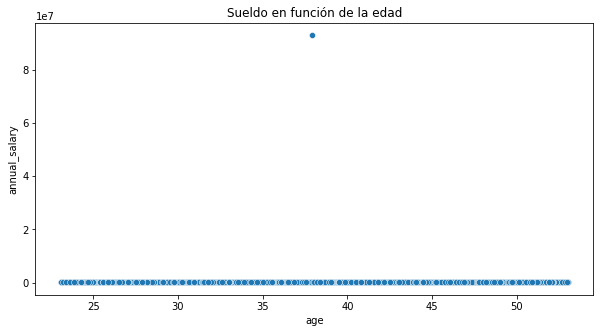

In [2]:
plt.rcParams['figure.figsize'] = (10,5)

url = 'https://gist.githubusercontent.com/deanjamesss/f8f5781fb682fb728e9674dda9813982/raw/801df9e7b9af894af1f69ba1a40af909160891aa/employee_data.csv'
data = pd.read_csv(url)

# Añado la información de Cristiano Ronaldo
cristiano_ronaldo = pd.DataFrame(
    [(999,'Cristiano', 'Ronaldo', 'M', '1985-02-05', '', 93000000, '' )],
    columns = data.columns
    )

data = data.append(cristiano_ronaldo)

# Calculo la edad
data['age'] = pd.Timestamp.today() - pd.to_datetime(data['birth_date'])
data['age'] = data['age'].apply(lambda x: x.days/365)

# Muestro el gráfico
sns.scatterplot(
    data = data, 
    x = 'age',
    y = 'annual_salary'
)

plt.title('Sueldo en función de la edad')

In [3]:
print(f"""Valores con Cristiano Ronaldo
Media: {data['annual_salary'].mean()}
Desviación Estándar: {data['annual_salary'].std()}

Valores sin Cristiano Ronaldo
Media: {data.iloc[:-1,:]['annual_salary'].mean()}
Desviación Estándar: {data.iloc[:-1,:]['annual_salary'].std()}
""")


Valores con Cristiano Ronaldo
Media: 194915.179
Desviación Estándar: 2937821.3755456787

Valores sin Cristiano Ronaldo
Media: 102017.1961961962
Desviación Estándar: 27567.849832155607



Histograma

Text(0.5, 0.98, 'Histograma')

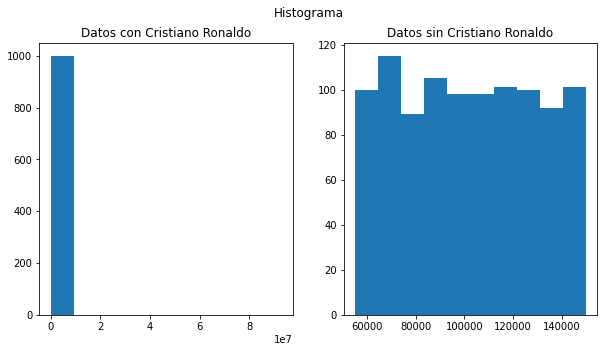

In [4]:
fig, ax = plt.subplots(1,2)

ax[0].hist(
    data['annual_salary'],
    bins = 10
)

ax[1].hist(
    data.iloc[:-1,:]['annual_salary'],
    bins = 10
)

ax[0].axes.set_title('Datos con Cristiano Ronaldo')
ax[1].axes.set_title('Datos sin Cristiano Ronaldo')

plt.suptitle('Histograma')

Boxplot

Text(0.5, 0.98, 'Boxplot')

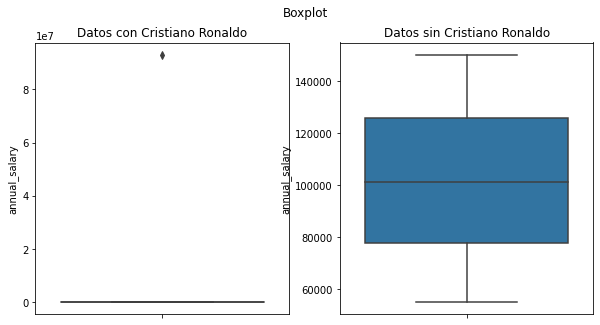

In [5]:
fig, ax = plt.subplots(1,2)

sns.boxplot(
    y = data['annual_salary'],
    ax = ax[0]
)

sns.boxplot(
    y = data.iloc[:-1,:]['annual_salary'],
    ax = ax[1]
)

ax[0].axes.set_title('Datos con Cristiano Ronaldo')
ax[1].axes.set_title('Datos sin Cristiano Ronaldo')

plt.suptitle('Boxplot')

Transformación de los datos

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Text(0.5, 0.98, 'Relación con datos brutos')

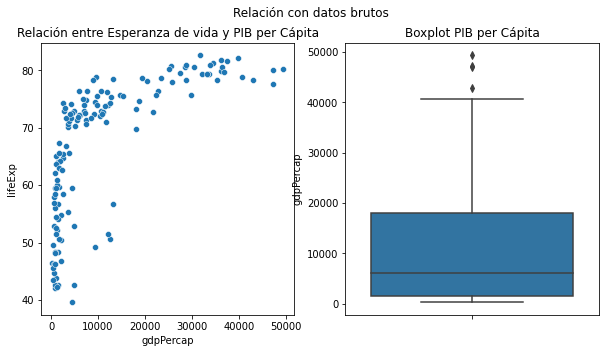

In [6]:
!pip install gapminder

import pandas as pd
import matplotlib.pyplot as plt
from gapminder import gapminder
import seaborn as sns
import numpy as np

fig, ax = plt.subplots(1, 2)

sns.scatterplot(
   data = gapminder.loc[gapminder['year'] == 2007],
   x = 'gdpPercap',
   y = 'lifeExp',
   ax = ax[0]
)

sns.boxplot(
   data = gapminder.loc[gapminder['year'] == 2007],
   y = 'gdpPercap',
   ax = ax[1]
)

ax[0].axes.set_title('Relación entre Esperanza de vida y PIB per Cápita')
ax[1].axes.set_title('Boxplot PIB per Cápita')
plt.suptitle('Relación con datos brutos')

Text(0.5, 0.98, 'Relación con datos transformados')

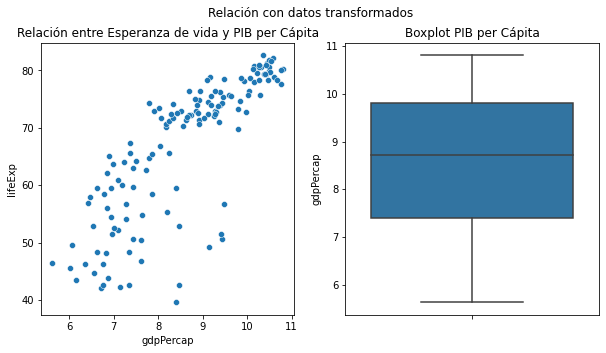

In [7]:
gapminder_transformed =  gapminder.loc[gapminder['year'] == 2007].copy()
gapminder_transformed['gdpPercap'] = np.log(gapminder_transformed['gdpPercap'])

fig, ax = plt.subplots(1, 2)

sns.scatterplot(
   data = gapminder_transformed,
   x = 'gdpPercap',
   y = 'lifeExp',
   ax = ax[0]
)

sns.boxplot(
   data = gapminder_transformed,
   y = 'gdpPercap',
   ax = ax[1]
)
ax[0].axes.set_title('Relación entre Esperanza de vida y PIB per Cápita')
ax[1].axes.set_title('Boxplot PIB per Cápita')

plt.suptitle('Relación con datos transformados')